## 4. Análisis Exploratorio de Datos (EDA)

In [1]:
# Librerias procesamiento
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Librerias visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 4.1. Resumen Estadístico

In [29]:
df = pd.read_csv('cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-06-03   33.876667   34.226665   33.799999   33.986668   31.306107   
2019-06-03   33.349998   33.830002   33.080002   33.700001   31.525806   
2019-06-03  239.779999  241.539993  238.080002  241.070007  220.875504   
2019-06-03   41.240002   41.320000   40.939999   41.040001   30.860123   
2019-06-03  114.699997  116.099998  114.470001  115.989998   91.956284   

              Volume         Sector Ticker  
Date                                        
2019-06-03  19844100  Supermercados    WMT  
2019-06-03  11019400    Manufactura     GM  
2019-06-03   2512500  Supermercados   COST  
2019-06-03   5412100        Energia     BP  
2019-06-03   6100800        Energia    CVX

In [7]:
print('-' * 70)
print(f"La extensión de filas y columnas en el DataFrame es:{df.shape}")
print('-' * 70)
print("\n")
df.info()

----------------------------------------------------------------------
La extensión de filas y columnas en el DataFrame es:(18624, 8)
----------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18624 entries, 2019-06-03 to 2022-06-29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       18624 non-null  float64
 1   High       18624 non-null  float64
 2   Low        18624 non-null  float64
 3   Close      18624 non-null  float64
 4   Adj Close  18624 non-null  float64
 5   Volume     18624 non-null  int64  
 6   Sector     18624 non-null  object 
 7   Ticker     18624 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ MB


In [8]:
for Sector in df['Sector'].unique():
    print(f"Estadísticas del sector: {Sector}")
    print(df[df['Sector'] == Sector].describe().round(1))
    print("\n")

Estadísticas del sector: Supermercados
         Open    High     Low   Close  Adj Close       Volume
count  2328.0  2328.0  2328.0  2328.0     2328.0       2328.0
mean    153.4   154.9   151.9   153.5      144.7   11877449.5
std     168.7   170.4   167.0   168.8      160.6   12344198.6
min      20.8    21.0    20.7    20.8       18.6     543600.0
25%      38.1    38.5    37.7    38.1       35.4    2788000.0
50%      46.8    47.1    46.4    46.7       44.4    7517150.0
75%     302.7   305.5   300.2   302.8      279.1   17631675.0
max     607.3   612.3   597.7   608.0      584.4  132940200.0


Estadísticas del sector: Manufactura
         Open    High     Low   Close  Adj Close       Volume
count  2328.0  2328.0  2328.0  2328.0     2328.0       2328.0
mean     75.5    76.4    74.5    75.4       70.2   30017022.5
std      74.3    75.1    73.5    74.3       69.6   36649184.1
min       4.3     4.4     4.0     4.0        3.3     585700.0
25%      14.0    14.2    13.8    13.9       11.6    42

----------------------------------------------------------------------
número de datos duplicados: 0
----------------------------------------------------------------------




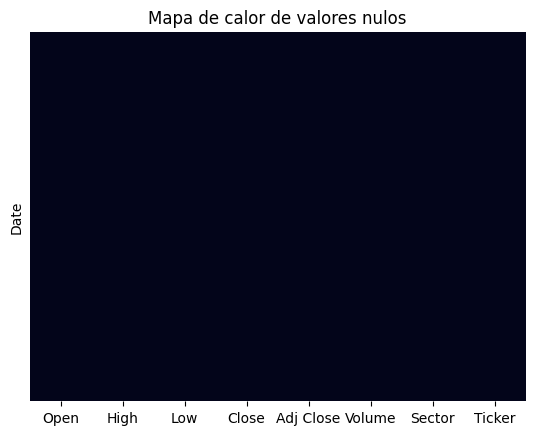

In [9]:
print('-' * 70)
print(f"número de datos duplicados: {df.duplicated().sum()}")
print('-' * 70)
print("\n")
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Mapa de calor de valores nulos')
plt.show()

## 4.2. Visualización de la Distribución de Precios

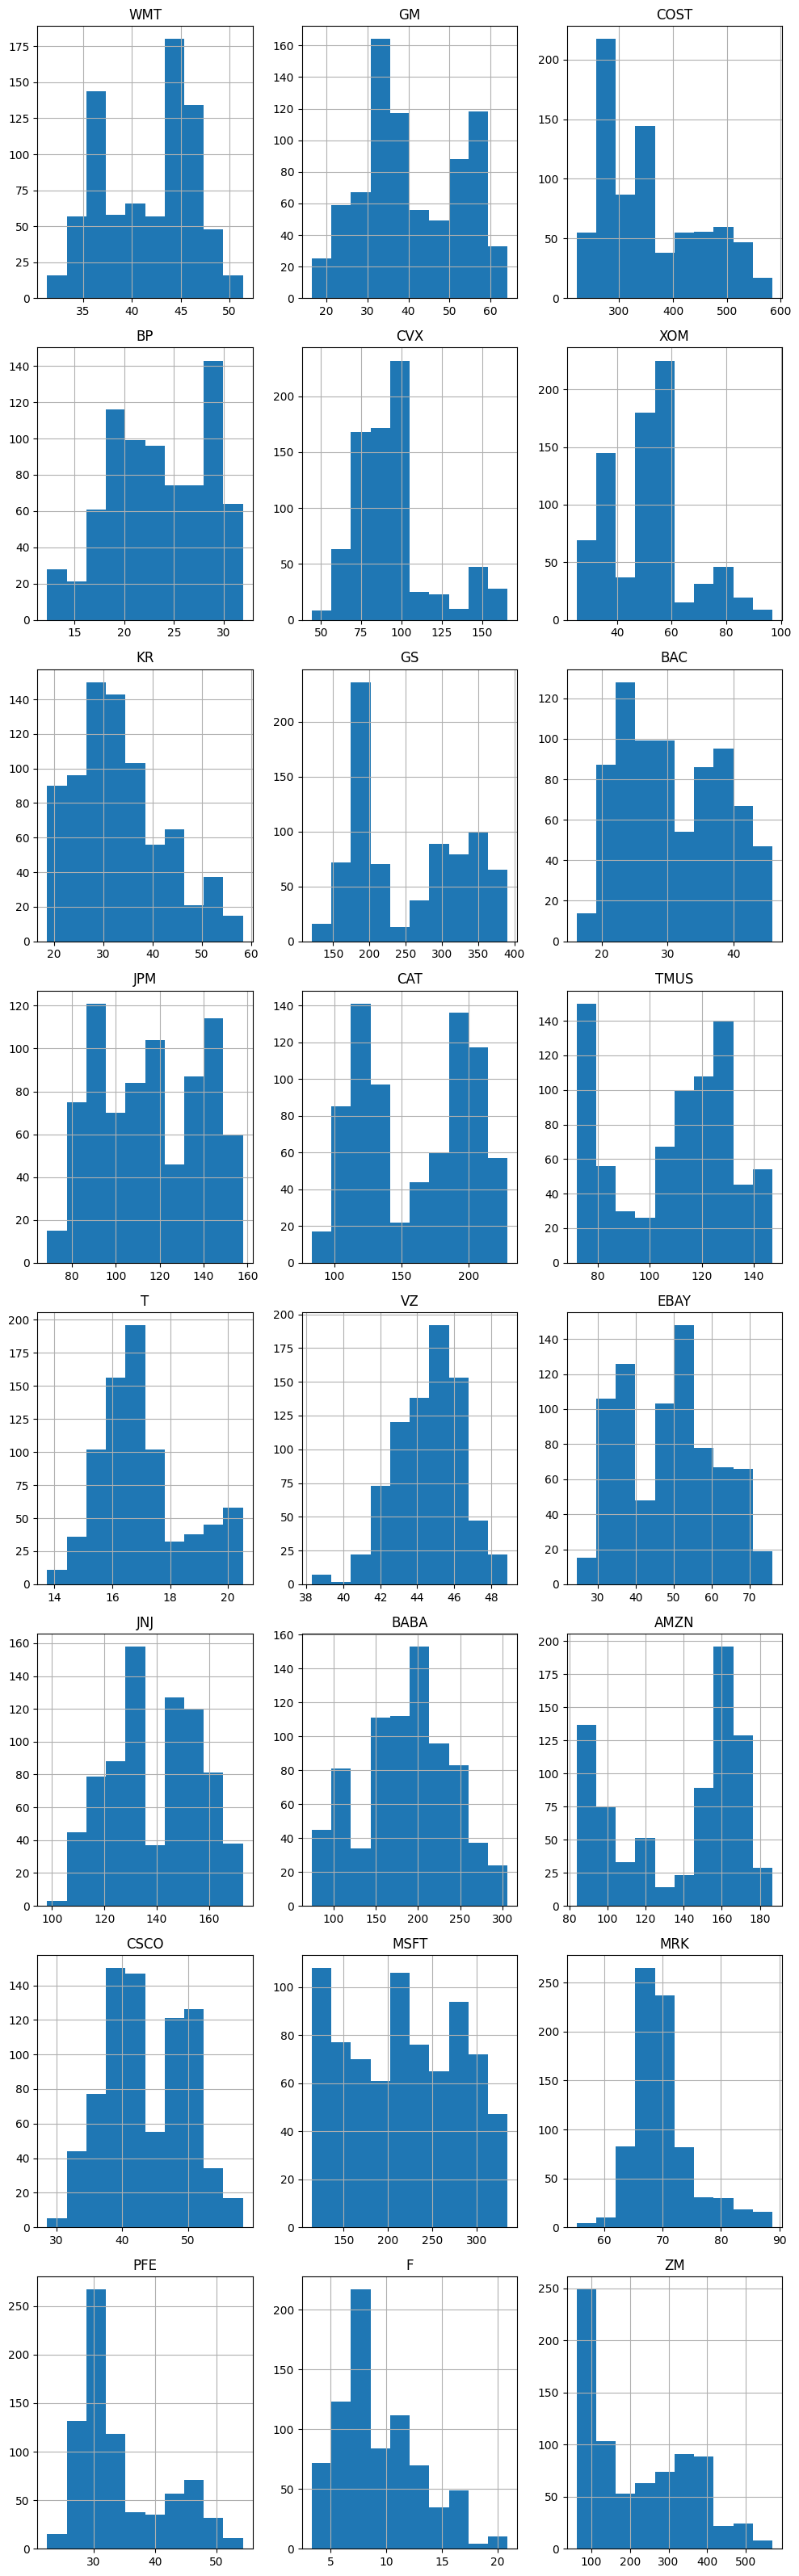

In [10]:
tickers = df['Ticker'].unique()

num_total = len(tickers)
num_filas = (num_total - 1) // 3 + 1

plt.rcParams['figure.figsize'] = [10, 4 * num_filas]
fig, axes = plt.subplots(num_filas, 3)

axes = np.array(axes).flatten()

for i, ticker in enumerate(tickers):
    df[df['Ticker']== ticker]['Adj Close'].hist(ax=axes[i])
    axes[i].set_title(ticker)

for i in range(num_total, num_filas * 3):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.rcParams['figure.figsize'] = [6.4, 4.8]

plt.show()

In [11]:
outliers = []

for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker]['Adj Close']

    # Calcular Q1, Q3 e IQR
    Q1 = ticker_data.quantile(0.25)
    Q3 = ticker_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    ticker_outliers = ticker_data[(ticker_data < lower_bound) | (ticker_data > upper_bound)].count()

    sector_data = df[df['Ticker'] == ticker]['Sector'].unique()

    if len(sector_data) > 0:
        sector = sector_data[0]
    else:
        sector ="Unknown"

    outliers.append({
        'sector': sector,
        'Ticker': ticker,
        'outliers_count': ticker_outliers
       })

outliers_df = pd.DataFrame(outliers)
outliers_df

sector Ticker  outliers_count
0                Supermercados    WMT               0
1                  Manufactura     GM               0
2                Supermercados   COST               0
3                      Energia     BP               0
4                      Energia    CVX              83
5                      Energia    XOM              18
6                Supermercados     KR               9
7                     Finanzas     GS               0
8                     Finanzas    BAC               0
9                     Finanzas    JPM               0
10                 Manufactura    CAT               0
11          Telecomunicaciones   TMUS               0
12          Telecomunicaciones      T              47
13          Telecomunicaciones     VZ               7
14                  E-commerce   EBAY               0
15                Farmaceutica    JNJ               0
16                  E-commerce   BABA               0
17                  E-commerce   AMZN               0
18  Tecnologia de Comunicación   CSCO               0
19  Tecnologia de Comunicación   MSFT               0
20                Farmaceutica    MRK              68
21                Farmaceutica    PFE               2
22                 Manufactura      F              10
23  Tecnologia de Comunicación     ZM               0

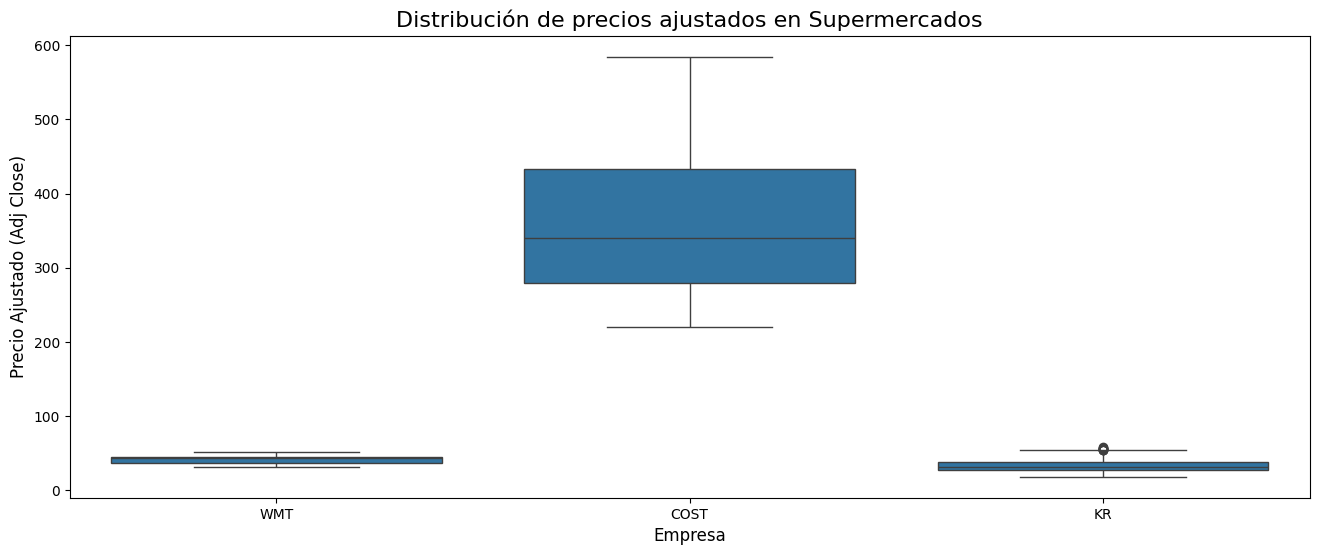

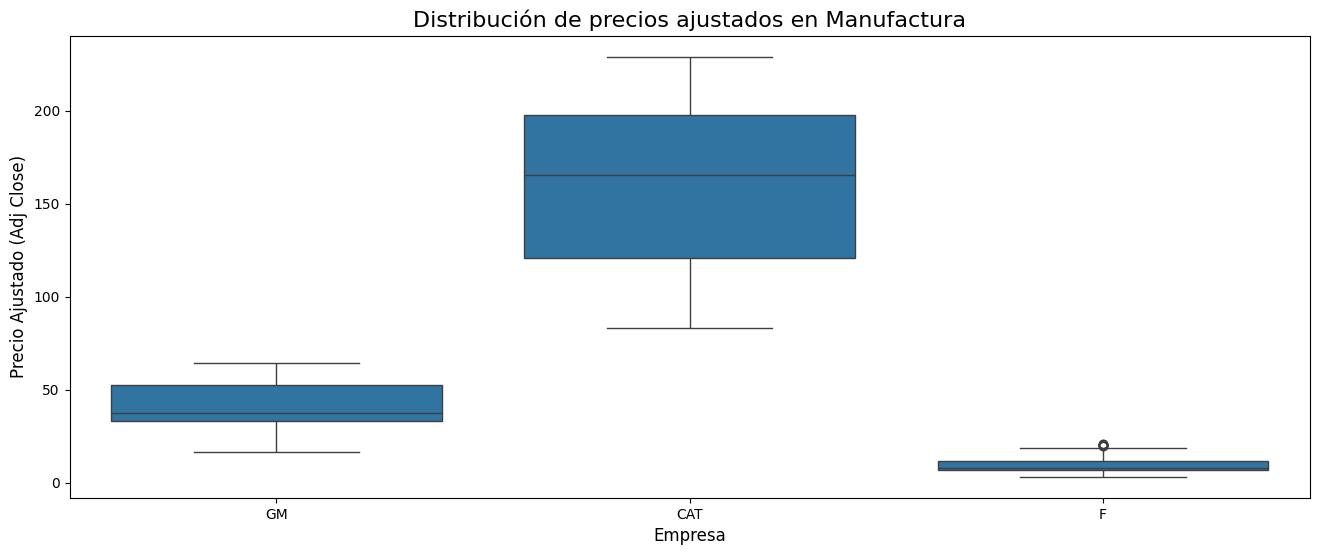

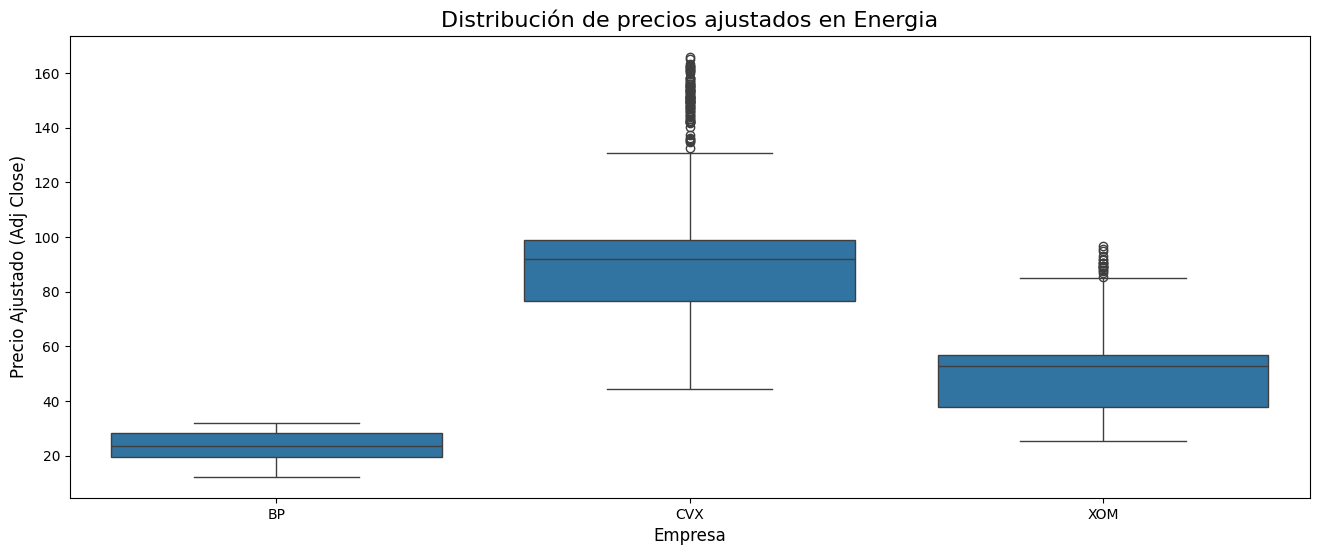

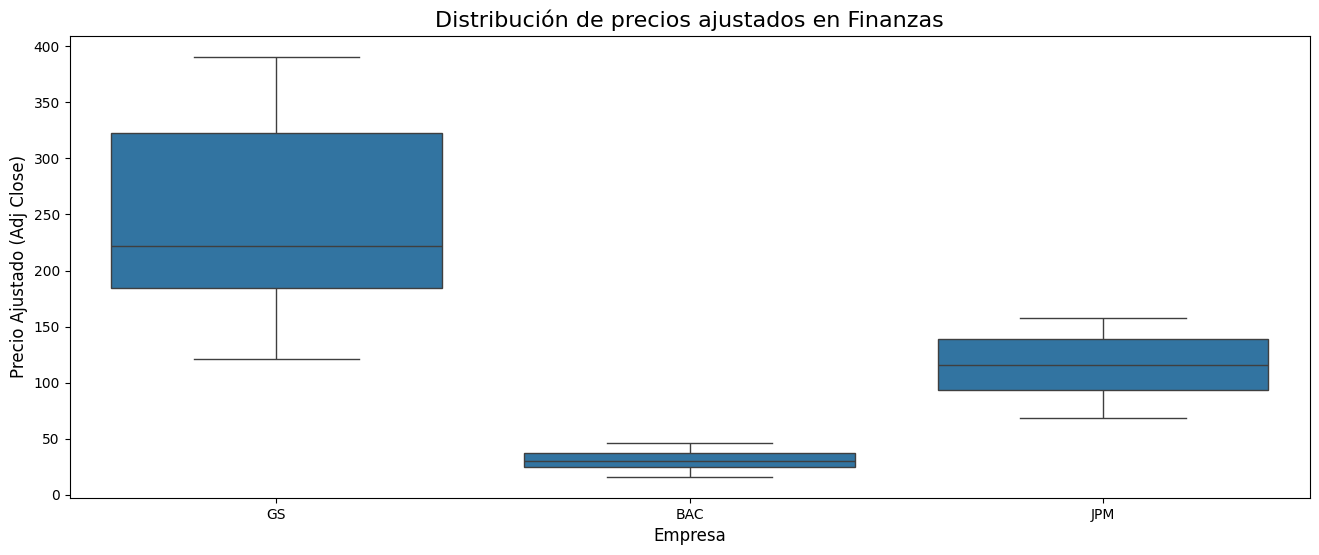

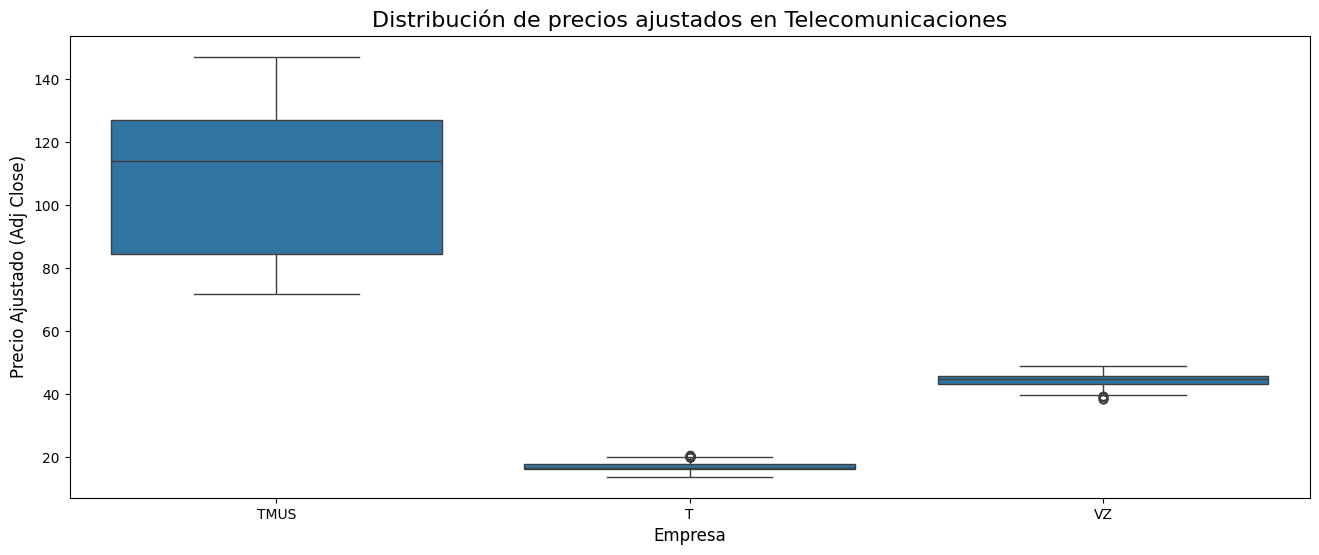

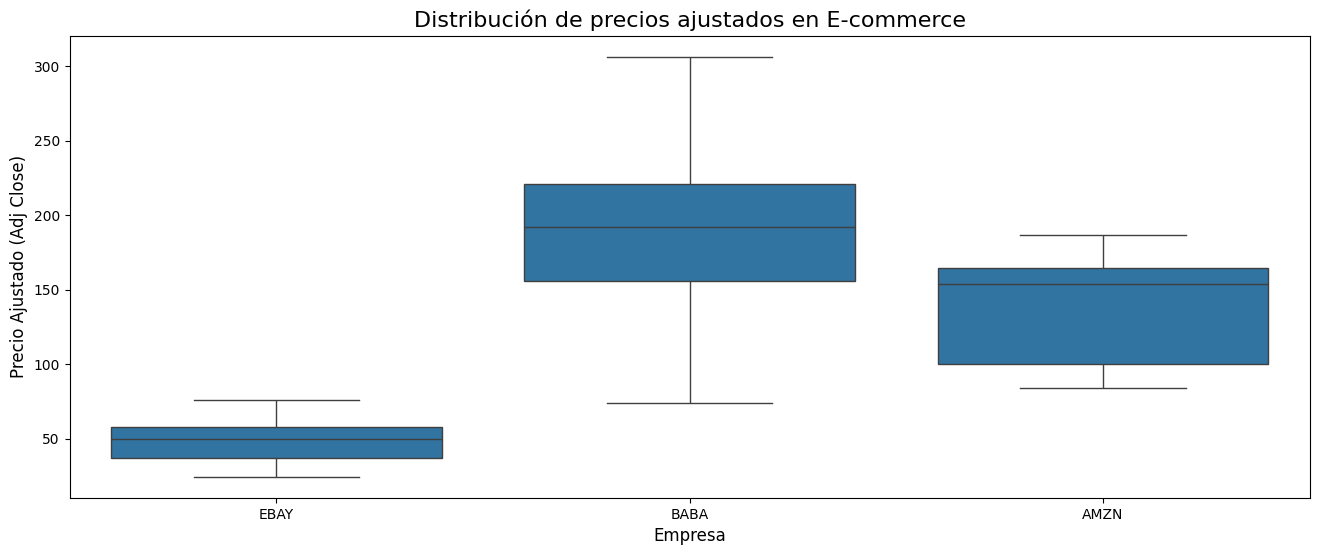

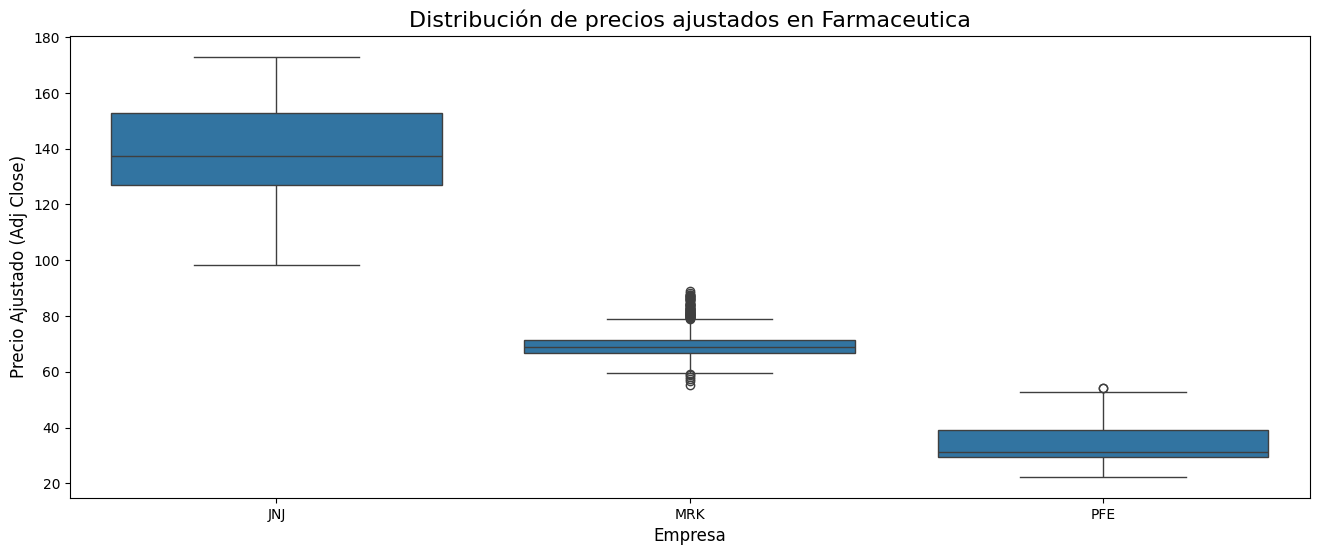

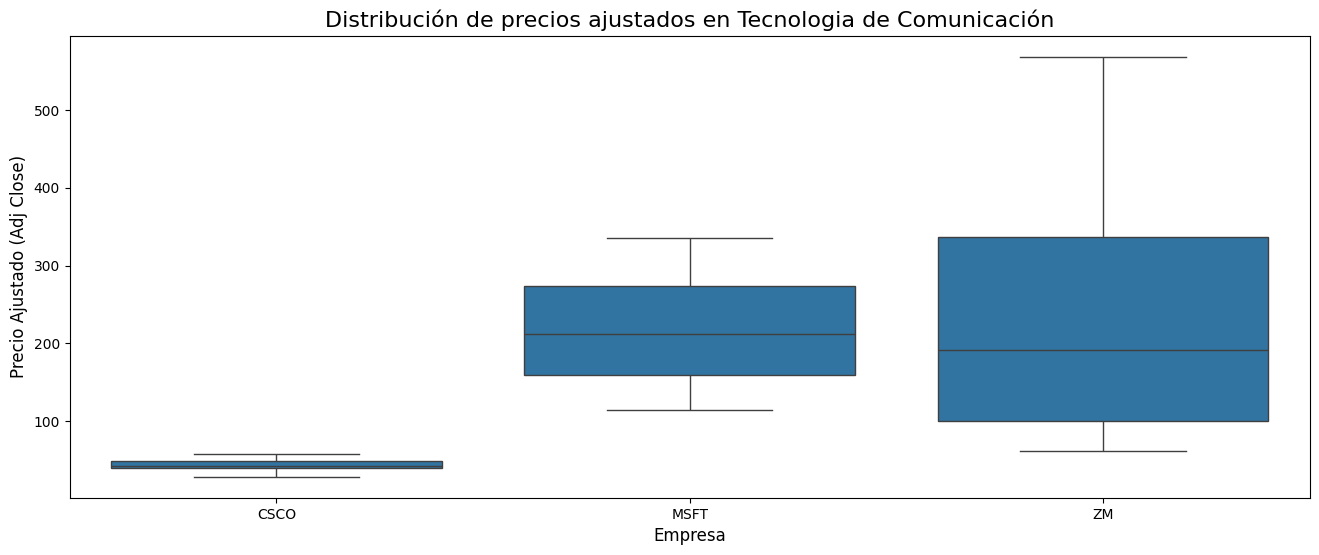

In [12]:
sectors = df['Sector'].unique()

# Crear gráficos separados para cada sector
for sector in sectors:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x='Ticker', y='Adj Close', data=df[df['Sector'] == sector])
    plt.title(f'Distribución de precios ajustados en {sector}', fontsize=16)
    plt.xlabel('Empresa', fontsize=12)
    plt.ylabel('Precio Ajustado (Adj Close)', fontsize=12)
    plt.show()

In [13]:
out_df = outliers_df[outliers_df['outliers_count']>0].sort_values('outliers_count',ascending=False)

fig_outliers = px.treemap(out_df, path=['sector', 'Ticker'], values='outliers_count',
                  color='sector', title="Treemap de outliers por Sector y Ticker")
fig_outliers.show()

Sectores sin Outliers:

Empresas de sectores como supermercados (WMT, COST, KR), manufactura (GM, CAT, F), finanzas (GS, BAC, JPM) y telecomunicaciones (TMUS, EBAY, CSCO, MSFT, ZM) no presentan outliers, lo que sugiere una estabilidad en los precios de sus acciones. Durante la pandemia, estos sectores pudieron haber experimentado una demanda constante o incluso un aumento en ciertas áreas, como los supermercados, que vieron un incremento en las compras debido a la preocupación por la disponibilidad de alimentos y productos esenciales.

Sectores con Outliers:

- Energía: La alta volatilidad en el sector energético, evidenciada por el número significativo de outliers en CVX (83) y XOM (18), indica que las empresas enfrentaron desafíos importantes durante la pandemia. La caída de la demanda de petróleo debido a los confinamientos y restricciones de movilidad podría haber provocado fluctuaciones drásticas en los precios de sus acciones.
- Telecomunicaciones: El número de outliers en T (47) sugiere que este sector experimentó variaciones en su desempeño. A medida que más personas trabajaban desde casa, los servicios de telecomunicaciones fueron cruciales, pero también pueden haber enfrentado desafíos por la competencia y cambios en la demanda.
- Farmacéuticas: La cantidad notable de outliers en MRK (68) y un número menor en PFE (2) reflejan el impacto que la pandemia tuvo en el sector farmacéutico, que experimentó una gran presión por la búsqueda de tratamientos y vacunas. Los cambios en el sentimiento del mercado respecto a desarrollos clínicos, aprobación de productos y noticias sobre el COVID-19 podrían haber llevado a variaciones significativas en los precios de las acciones.

## 4.3. Análisis Temporal del Precio

In [14]:
# Periodo pre-pandemia junio 2019 - febrero 2020
pre_pandemic =  df.loc['2019-06':'2020-02'].copy()

# Periodo pandemia marzo 2020 - mayo 2021
pandemic = df.loc['2020-03':'2021-05'].copy()

# Periodo post pandemia junio 2021 - junio 2022
post_pandemic = df.loc['2021-06':'2022-06'].copy()

pre_pandemic.shape, pandemic.shape, post_pandemic.shape

((4512, 8), (7560, 8), (6552, 8))

Pre pandemic

In [15]:
slopes_pre = []

sector_pre = pre_pandemic['Sector'].unique()

for sector in sector_pre:
    df_sector = pre_pandemic[pre_pandemic['Sector'] == sector]

    fig_pre_pandemic = go.Figure()

    for ticker in df_sector['Ticker'].unique():
        df_ticker = df_sector[df_sector['Ticker'] == ticker]

        fig_pre_pandemic.add_trace(go.Scatter(x=df_ticker.index,
                                 y=df_ticker['Adj Close'],
                                 mode='lines',
                                 name=ticker))

        x = np.arange(len(df_ticker))
        y = df_ticker['Adj Close'].values

        # Coeficientes de la regresión lineal
        coef = np.polyfit(x, y, 1)
        poly_eq = np.poly1d(coef)

        # Guardar la pendiente (coef[0]) en la lista
        slopes_pre.append({
            'Sector': sector,
            'Ticker': ticker,
            'Slope': coef[0]
        })

        # Agregar la traza de la línea de regresión
        fig_pre_pandemic.add_trace(go.Scatter(x=df_ticker.index,
                                 y=poly_eq(x),
                                 mode='lines',
                                 name=f'{ticker} - Regresión',
                                 line=dict(dash='dash')))

    fig_pre_pandemic.update_layout(title=f'Evolución del Precio Ajustado - Sector: {sector} - Pre-Pandemia (junio 2019 - febrero 2020)',
                      xaxis_title='Fecha',
                      yaxis_title='Precio Ajustado (Adj Close)',
                      showlegend=True)

    fig_pre_pandemic.show()

slopes_df = pd.DataFrame(slopes_pre)

Pandemic

In [16]:
slopes_pan = []

sector_pan = pandemic['Sector'].unique()

for sector in sector_pan:
    df_sector = pandemic[pandemic['Sector'] == sector]

    fig_pandemic = go.Figure()

    for ticker in df_sector['Ticker'].unique():
        df_ticker = df_sector[df_sector['Ticker'] == ticker]

        fig_pandemic.add_trace(go.Scatter(x=df_ticker.index,
                                 y=df_ticker['Adj Close'],
                                 mode='lines',
                                 name=ticker))

        x = np.arange(len(df_ticker))
        y = df_ticker['Adj Close'].values

        # Coeficientes de la regresión lineal
        coef = np.polyfit(x, y, 1)
        poly_eq = np.poly1d(coef)

        # Guardar la pendiente (coef[0]) en la lista
        slopes_pan.append({
            'Sector': sector,
            'Ticker': ticker,
            'Slope': coef[0]
        })

        # Agregar la traza de la línea de regresión
        fig_pandemic.add_trace(go.Scatter(x=df_ticker.index,
                                 y=poly_eq(x),
                                 mode='lines',
                                 name=f'{ticker} - Regresión',
                                 line=dict(dash='dash')))

    fig_pandemic.update_layout(title=f'Evolución del Precio Ajustado - Sector: {sector} - Pandemia (Marzo 2020 - Mayo 2021)',
                      xaxis_title='Fecha',
                      yaxis_title='Precio Ajustado (Adj Close)',
                      showlegend=True)

    fig_pandemic.show()

slopes_pan_df = pd.DataFrame(slopes_pan)

Post-Pandemic

In [18]:
slopes_pos = []

sector_pos = post_pandemic['Sector'].unique()

for sector in sector_pos:
    df_sector = post_pandemic[post_pandemic['Sector'] == sector]

    fig_post_pandemic = go.Figure()

    for ticker in df_sector['Ticker'].unique():
        df_ticker = df_sector[df_sector['Ticker'] == ticker]

        fig_post_pandemic.add_trace(go.Scatter(x=df_ticker.index,
                                 y=df_ticker['Adj Close'],
                                 mode='lines',
                                 name=ticker))

        x = np.arange(len(df_ticker))
        y = df_ticker['Adj Close'].values

        # Coeficientes de la regresión lineal
        coef = np.polyfit(x, y, 1)
        poly_eq = np.poly1d(coef)

        # Guardar la pendiente (coef[0]) en la lista
        slopes_pos.append({
            'Sector': sector,
            'Ticker': ticker,
            'Slope': coef[0]
        })

        # Agregar la traza de la línea de regresión
        fig_post_pandemic.add_trace(go.Scatter(x=df_ticker.index,
                                 y=poly_eq(x),
                                 mode='lines',
                                 name=f'{ticker} - Regresión',
                                 line=dict(dash='dash')))

    fig_post_pandemic.update_layout(title=f'Evolución del Precio Ajustado - Sector: {sector} - post pandemia (junio 2021 - junio 2022)',
                      xaxis_title='Fecha',
                      yaxis_title='Precio Ajustado (Adj Close)',
                      showlegend=True)

    fig_post_pandemic.show()

slopes_pos_df = pd.DataFrame(slopes_pos)

In [19]:
# Grafica de volatilidades de los retornos diarios en cada periodo
slopes = [slopes_df, slopes_pan_df, slopes_pos_df]
titles_sl = [
    "Evolución de las Pendientes por Sector y Ticker - Pre-Pandemia (Junio 2019 - Febrero 2020)",
    "Evolución de las Pendientes por Sector y Ticker - Pandemia (Marzo 2020 - Mayo 2021)",
    "Evolución de las Pendientes por Sector y Ticker - Post-Pandemia (Junio 2021 - junio 2022)"
]

for df,title in zip(slopes,titles_sl):
  fig_volatilities = px.bar(df, x='Sector', y='Slope', color='Ticker',
                 title=title)
  fig_volatilities.show()

Durante el periodo pre-pandemia, el mercado mostró un comportamiento moderadamente positivo, con varios sectores en crecimiento, aunque algunos ya indicaban debilidad antes del impacto global del COVID-19. Los sectores tecnológicos, financieros y de consumo esencial fueron los más destacados. Microsoft y Alibaba, en tecnología, lideraron el crecimiento gracias a la digitalización y el auge del comercio electrónico, aunque algunas empresas, como Cisco y Zoom, mostraron una ligera depreciación. En finanzas, empresas como Goldman Sachs, JPMorgan y Bank of America reflejaron un crecimiento estable, impulsadas por un entorno financiero favorable. El sector de supermercados, liderado por Costco, también mostró una apreciación significativa, aunque Walmart y Kroger presentaron un crecimiento más moderado. En contraste, los sectores de energía y manufactura ya enfrentaban desafíos, con empresas como ExxonMobil y Ford experimentando una baja en sus precios ajustados debido a la disminución en la demanda y preocupaciones sobre la sostenibilidad.

Para el periodo de pandemia (marzo 2020 a mayo 2021), los mercados registraron una clara apreciación en la mayoría de los sectores, especialmente en tecnología, finanzas y manufactura. El trabajo remoto impulsó a empresas como Zoom y Microsoft a un crecimiento considerable, mientras que el sector financiero, liderado por Goldman Sachs y JPMorgan, también experimentó una valorización significativa, probablemente debido al movimiento de capitales durante la crisis. La manufactura, con empresas como Caterpillar y General Motors, mostró signos de recuperación, beneficiándose de la reactivación económica. Otros sectores, como el e-commerce y los supermercados, también tuvieron un comportamiento positivo, reflejando la creciente demanda por productos esenciales. Sin embargo, el sector de telecomunicaciones, a pesar de su relevancia durante la pandemia, mostró un crecimiento moderado, con T-Mobile destacándose entre sus competidores.

En la post-pandemia (junio 2021 a junio 2022), el comportamiento del mercado fue más heterogéneo, con algunos sectores en crecimiento y otros enfrentando correcciones significativas tras el auge impulsado por la pandemia. El sector de e-commerce, que había crecido exponencialmente, experimentó una fuerte corrección, con empresas como Alibaba, Amazon y eBay registrando caídas en sus valores. El sector tecnológico también sufrió una corrección, con Zoom enfrentando una caída considerable y empresas como Microsoft y Cisco mostrando caídas más leves. En contraste, sectores como energía se recuperaron de manera significativa, con Chevron y ExxonMobil mostrando apreciaciones importantes debido al aumento en los precios del petróleo. El sector de supermercados mantuvo una tendencia positiva, liderado por Costco, mientras que el sector de telecomunicaciones mostró señales de desaceleración. Finalmente, el sector financiero también enfrentó una corrección negativa, con empresas como Goldman Sachs y JPMorgan mostrando caídas en sus precios, reflejando la volatilidad económica y la incertidumbre en los mercados financieros.


**Diferencia precio promedio (Adj Close) peridodo post pandemia y pandemia**

In [20]:
# Precio promedio pandemia
pan_mean_price = pandemic.groupby(['Sector','Ticker'])['Adj Close'].mean().reset_index()
pan_mean_price.columns = ['Sector', 'Ticker','pan_mean_price']

# Precio promedio post pandemia
pos_mean_price = post_pandemic.groupby(['Sector','Ticker'])['Adj Close'].mean().reset_index()
pos_mean_price.columns = ['Sector', 'Ticker','pos_mean_price']

# Agregara post pandemic los precios promedio del periodo pandemia y calcular la diferencia
pos_mean_price['pan_mean_price'] = pan_mean_price['pan_mean_price']
pos_mean_price['dif_mean_price'] = pos_mean_price['pos_mean_price'] - pos_mean_price['pan_mean_price']

In [21]:
fig_dif_price = px.bar(pos_mean_price, x='Sector', y='dif_mean_price', color='Ticker',
             title="Diferencia en el precio promedio(Adj Close) por Sector y Ticker en los periodo de post pandemia y Pandemia")
fig_dif_price.show()

Durante el periodo post-pandemia (junio 2021 - junio 2022), la mayoría de los sectores analizados mostró una apreciación significativa en el precio promedio de sus activos en comparación con el periodo de pandemia. En particular, el sector financiero, energético, de manufactura, supermercados y tecnología de comunicación lideraron esta recuperación, mientras que el e-commerce y las telecomunicaciones experimentaron una corrección en sus precios.

El sector financiero registró un incremento notable en empresas como Goldman Sachs (GS), que aumentó en 117.84, y JPMorgan Chase (JPM), con 33.18. Estos resultados reflejan una sólida recuperación tras la pandemia, impulsada por un mayor movimiento de capitales y la recuperación de la economía global. Del mismo modo, el sector energético mostró un fuerte repunte, con Chevron (CVX) y ExxonMobil (XOM) aumentando en 39.75 y 26.01, respectivamente, debido a la creciente demanda de energía a medida que las restricciones de la pandemia se levantaban.

El sector manufacturero también destacó, con Caterpillar (CAT) liderando la recuperación con un incremento de 45.25, mientras que General Motors (GM) y Ford (F) también registraron aumentos, reflejando una mayor actividad industrial. En el sector de supermercados, Costco (COST) fue el mayor ganador, con una subida de 146.88, impulsada por una demanda sostenida de bienes esenciales.

En cuanto al sector de tecnología de comunicación, Microsoft (MSFT) mostró un aumento de 83.19, lo que indica que la digitalización y la adopción de tecnologías continuaron siendo clave en la recuperación post-pandemia.

Por otro lado, sectores como e-commerce y telecomunicaciones mostraron un comportamiento diferente. Empresas como Alibaba (BABA) y Zoom (ZM) experimentaron caídas significativas de 96.23 y 95.45, respectivamente, lo que sugiere una corrección tras el extraordinario crecimiento durante la pandemia. En telecomunicaciones, compañías como AT&T (T) y Verizon (VZ) vieron ligeros descensos de 0.37 y 1.16, mientras que T-Mobile (TMUS) registró un aumento modesto de 13.47, reflejando una estabilización en la demanda de servicios de telecomunicaciones.

Finalmente, el sector farmacéutico mostró incrementos moderados, con Pfizer (PFE) y Johnson & Johnson (JNJ) viendo subidas de 12.81 y 21.41, respectivamente, lo que sugiere una consolidación del sector tras el impacto inicial de la pandemia.

En resumen, la recuperación post-pandemia ha sido marcada por una apreciación generalizada en la mayoría de los sectores, especialmente en finanzas, energía, manufactura y tecnología. Sin embargo, sectores que experimentaron un auge durante la pandemia, como el e-commerce y telecomunicaciones, han mostrado una corrección o estabilización en sus precios promedio.

## 4.4. Volatilidad

In [22]:
# Se agrega los retornos normalizados y variacion diaria de retornos al Periodo pre-pandemia
pre_pandemic['return_rebased'] = pre_pandemic.groupby('Ticker')['Adj Close'].transform(lambda x: x / x.iloc[0])
pre_pandemic['daily_return'] = pre_pandemic.groupby('Ticker')['return_rebased'].pct_change()

# Se agrega los retornos normalizados y variacion diaria de retornos al Periodo pandemia
pandemic['return_rebased'] = pandemic.groupby('Ticker')['Adj Close'].transform(lambda x: x / x.iloc[0])
pandemic['daily_return'] = pandemic.groupby('Ticker')['return_rebased'].pct_change()

# Se agrega los retornos normalizados y variacion diaria de retornos al Periodo post pandemia
post_pandemic['return_rebased'] = post_pandemic.groupby('Ticker')['Adj Close'].transform(lambda x: x / x.iloc[0])
post_pandemic['daily_return'] = post_pandemic.groupby('Ticker')['return_rebased'].pct_change()

pre_pandemic.shape, pandemic.shape, post_pandemic.shape

((4512, 10), (7560, 10), (6552, 10))

In [23]:
# Calculo de volatilidad de los retornos diarios en pre-pandemia
volatility_pre = pre_pandemic.dropna()
volatility_pre = pre_pandemic.groupby(['Sector','Ticker'])['daily_return'].std().reset_index()
volatility_pre.columns =['Sector','Ticker','std_daily_return']

# Calculo de volatilidad de los retornos diarios en pandemia
volatility_pan = pandemic.dropna()
volatility_pan = pandemic.groupby(['Sector','Ticker'])['daily_return'].std().reset_index()
volatility_pan.columns =['Sector','Ticker','std_daily_return']

# Calculo de volatilidad de los retornos diarios en post-pandemia
volatility_pos = post_pandemic.dropna()
volatility_pos = post_pandemic.groupby(['Sector','Ticker'])['daily_return'].std().reset_index()
volatility_pos.columns =['Sector','Ticker','std_daily_return']

volatility_pre.shape, volatility_pan.shape, volatility_pos.shape

((24, 3), (24, 3), (24, 3))

In [30]:
# Grafica de las volatilidades de los retornos diarios en cada periodo
volatilities = [volatility_pre, volatility_pan, volatility_pos]
titles = [
    "Volatilidad histórica de los retornos diarios por Sector y Ticker en el periodo Pre-Pandemia",
    "Volatilidad histórica de los retornos diarios por Sector y Ticker en el periodo Pandemia",
    "Volatilidad histórica de los retornos diarios por Sector y Ticker en el periodo Post-Pandemia"
]

for data,title in zip(volatilities,titles):
  fig_volatilities = px.bar(data, x='Sector', y='std_daily_return', color='Ticker',
                 title=title)
  fig_volatilities.show()

1. Durante el periodo de la pandemia (2020), se observó un aumento generalizado en la volatilidad de los retornos diarios en todos los sectores analizados. Por ejemplo, los tickers de ecommerce, como AMZN, BABA, y EBAY, mostraron incrementos en su volatilidad, pasando de un promedio de 0.013733, 0.018401, y 0.016821 pre-pandemia a 0.022406, 0.026101, y 0.023784 respectivamente. Este fenómeno es representativo de la incertidumbre del mercado durante el confinamiento y los cambios en el comportamiento del consumidor.

2. El sector energético experimentó un aumento notable en la volatilidad, con tickers como BP, CVX, y XOM que subieron su volatilidad promedio de 0.012233, 0.012322, y 0.014112 pre-pandemia a 0.036754, 0.035379, y 0.031248 durante la pandemia. Esto sugiere que este sector fue particularmente sensible a la dinámica del mercado durante este periodo de crisis.

3. Tras la pandemia, aunque la volatilidad general se redujo en comparación con el pico observado durante la crisis, ciertos sectores como el ecommerce continuaron mostrando una volatilidad alta, con tickers como BABA alcanzando un 0.043596, lo que indica que las condiciones del mercado siguen siendo volátiles y que los inversores permanecen cautelosos. En contraste, sectores como el farmacéutico y el telecomunicaciones experimentaron una disminución de la volatilidad, con valores promedio de 0.010242 y 0.010682 respectivamente, lo que sugiere una estabilización en estos sectores.

## 4.5. Rendimiento Acumulado (Total Returns)

In [35]:
# Se crea una df para calcular los return rebased en tada la de ventada estudio
returns = df[['Sector','Ticker','Adj Close']].copy()
returns['return_rebased'] = returns.groupby(['Sector','Ticker'])['Adj Close'].transform(lambda x: x/x.iloc[0])
returns.shape

(18624, 4)

In [38]:
for sector in returns['Sector'].unique():
    sector_comulative = returns[returns['Sector'] == sector]

    fig_total_returns = go.Figure()

    for ticker in sector_comulative['Ticker'].unique():
        df_ticker_com = sector_comulative[sector_comulative['Ticker'] == ticker]

        # Calcular cumin (mínimo acumulado) y cumax (máximo acumulado)
        cumin = np.minimum.accumulate(df_ticker_com['return_rebased'])
        cumax = np.maximum.accumulate(df_ticker_com['return_rebased'])

        fig_total_returns.add_trace(go.Scatter(x=df_ticker_com.index,
                                    y=df_ticker_com['return_rebased'],
                                    mode='lines',
                                    name=f'{ticker} - return rebased'))

        # Agregar la traza de cumin
        fig_total_returns.add_trace(go.Scatter(x=df_ticker_com.index,
                                    y=cumin,
                                    mode='lines',
                                    name=f'{ticker} - cumin',
                                    line=dict(dash='dash', color= 'red')))

        # Agregar la traza de cumax
        fig_total_returns.add_trace(go.Scatter(x=df_ticker_com.index,
                                    y=cumax,
                                    mode='lines',
                                    name=f'{ticker} - cumax',
                                    line=dict(dash='dash', color= 'green')))

    fig_total_returns.update_layout(title=f'Comulative Returns {sector}',
                        xaxis_title='Date',
                        yaxis_title='Return',
                        legend_title='Ticker',
                        )

    fig_total_returns.show()

In [36]:
# calculo de los retornos acomulados en todo el periodo de estudio junio 2019 - junio 2022
comulative_returns = returns.groupby(['Sector','Ticker'])['return_rebased'].apply(lambda x :(x.iloc[-1]-1)*100).reset_index()
comulative_returns.columns = ['Sector','Ticker','comulative_retunrs']
comulative_returns = comulative_returns.round(2)

# calculo de los retornos acomulados periodo pre pandemia
comulative_returns_pre = pre_pandemic.groupby(['Sector','Ticker'])['return_rebased'].apply(lambda x: (x.iloc[-1]-1)*100).reset_index()
comulative_returns_pre.columns = ['Sector','Ticker','comulative_retunrs']
comulative_returns_pre = comulative_returns_pre.round(2)

# calculo de los retornos acomulados periodo pandemia
comulative_returns_pan = pandemic.groupby(['Sector','Ticker'])['return_rebased'].apply(lambda x: (x.iloc[-1]-1)*100).reset_index()
comulative_returns_pan.columns = ['Sector','Ticker','comulative_retunrs']
comulative_returns_pan = comulative_returns_pan.round(2)

# calculo de los retornos acomulados periodo post pandemia
comulative_returns_pos = post_pandemic.groupby(['Sector','Ticker'])['return_rebased'].apply(lambda x: (x.iloc[-1]-1)*100).reset_index()
comulative_returns_pos.columns = ['Sector','Ticker','comulative_retunrs']
comulative_returns_pos = comulative_returns_pos.round(2)

comulative_returns.shape, comulative_returns_pre.shape, comulative_returns_pan.shape, comulative_returns_pos.shape

((24, 3), (24, 3), (24, 3), (24, 3))

In [37]:
list_comulative_returns = [comulative_returns, comulative_returns_pre, comulative_returns_pan, comulative_returns_pos]
comulatitive_titles = [
                      "Total retorno acomulado % periodo Junio 2019 - Junio 2022",
                      "Retorno acomulado % periodo Pre pandemia",
                      "Retorno acomulado % periodo pandemia",
                      "Retorno acomulado % periodo post pandemia"
]

for df,title in zip(list_comulative_returns,comulatitive_titles):
  fig_comulative_returns = px.bar(df, x='Sector', y='comulative_retunrs', color='Ticker',
                 title=title)
  fig_comulative_returns.show()

A lo largo del análisis entre junio 2019 y junio 2022, los sectores económicos mostraron diferentes comportamientos frente al impacto de la pandemia y su posterior recuperación. Es importante señalar que los cálculos se basan en los precios iniciales de cada periodo (pre-pandemia, pandemia, y post-pandemia), lo que permite observar las fluctuaciones relativas a los momentos clave del mercado.

Sectores con mejor desempeño durante la pandemia:

- Tecnologías de Comunicación y Supermercados lideraron el crecimiento durante la pandemia. Empresas como Zoom (+193.10%) y Microsoft (+46.30%), impulsadas por la demanda de soluciones de trabajo remoto, crecieron considerablemente. En el sector de supermercados, Kroger (+27.86%) y Costco (+26.89%) también mostraron un crecimiento significativo, reflejando el aumento en la demanda de productos esenciales.

- En el sector financiero, Goldman Sachs (+82.10%) y JPMorgan (+41.00%) experimentaron un crecimiento destacado, lo que subraya la resiliencia del sistema financiero global en medio de la crisis.

Resiliencia en sectores clave:

- El sector farmacéutico fue otro de los más estables durante la pandemia, con Johnson & Johnson (+24.92%) y Pfizer (+23.10%) mostrando una apreciación notable, impulsadas por su participación en el desarrollo de vacunas y tratamientos contra el COVID-19.

Caídas significativas post-pandemia:

- Tras el auge experimentado durante la pandemia, el sector e-commerce sufrió fuertes correcciones. Alibaba (-47.13%) y Amazon (-32.32%) vieron sus precios retroceder, lo que sugiere una normalización en la demanda de comercio digital a medida que las economías reabrieron.
El sector financiero también experimentó una corrección negativa post-pandemia, con Goldman Sachs (-18.93%) y JPMorgan (-28.80%) mostrando caídas debido a la volatilidad y la incertidumbre en los mercados financieros.

Sectores con mejor recuperación post-pandemia:

- El sector energético fue uno de los grandes beneficiados en la recuperación post-pandemia. Empresas como ExxonMobil (+53.16%) y Chevron (+43.95%) experimentaron un repunte significativo, impulsado por el alza en los precios del petróleo y la recuperación de la demanda energética global.

En resumen, los sectores de tecnología y supermercados lideraron durante la pandemia, mientras que el sector energético demostró una gran capacidad de recuperación post-pandemia. En contraste, sectores que prosperaron durante la pandemia, como el e-commerce, enfrentaron importantes correcciones al volver a la normalidad. Los cálculos, basados en los precios iniciales de cada periodo, proporcionan una visión clara del desempeño relativo de los sectores en cada fase del ciclo económico.








## 4.6. Correlación entre Sectores

In [39]:
# Crear un df con los tickers en columnas
pivot_df = returns.pivot_table(values='return_rebased', index=returns.index, columns='Ticker')
pivot_df.columns

Index(['AMZN', 'BABA', 'BAC', 'BP', 'CAT', 'COST', 'CSCO', 'CVX', 'EBAY', 'F',
       'GM', 'GS', 'JNJ', 'JPM', 'KR', 'MRK', 'MSFT', 'PFE', 'T', 'TMUS', 'VZ',
       'WMT', 'XOM', 'ZM'],
      dtype='object', name='Ticker')

In [40]:
# Generar metrix de correlacion recpecto a los retornos diarios
correlation_matrix = pivot_df.corr()

# Diccionario con los sectore y ticker
tickers_sectores = comulative_returns[['Sector','Ticker']].drop_duplicates().set_index('Ticker')['Sector'].to_dict()

# Modificar las etiquetas de los ticks con el formato 'Ticker (Sector)'
tickers_labels = [f'{ticker} ({tickers_sectores[ticker]})' for ticker in correlation_matrix.columns]

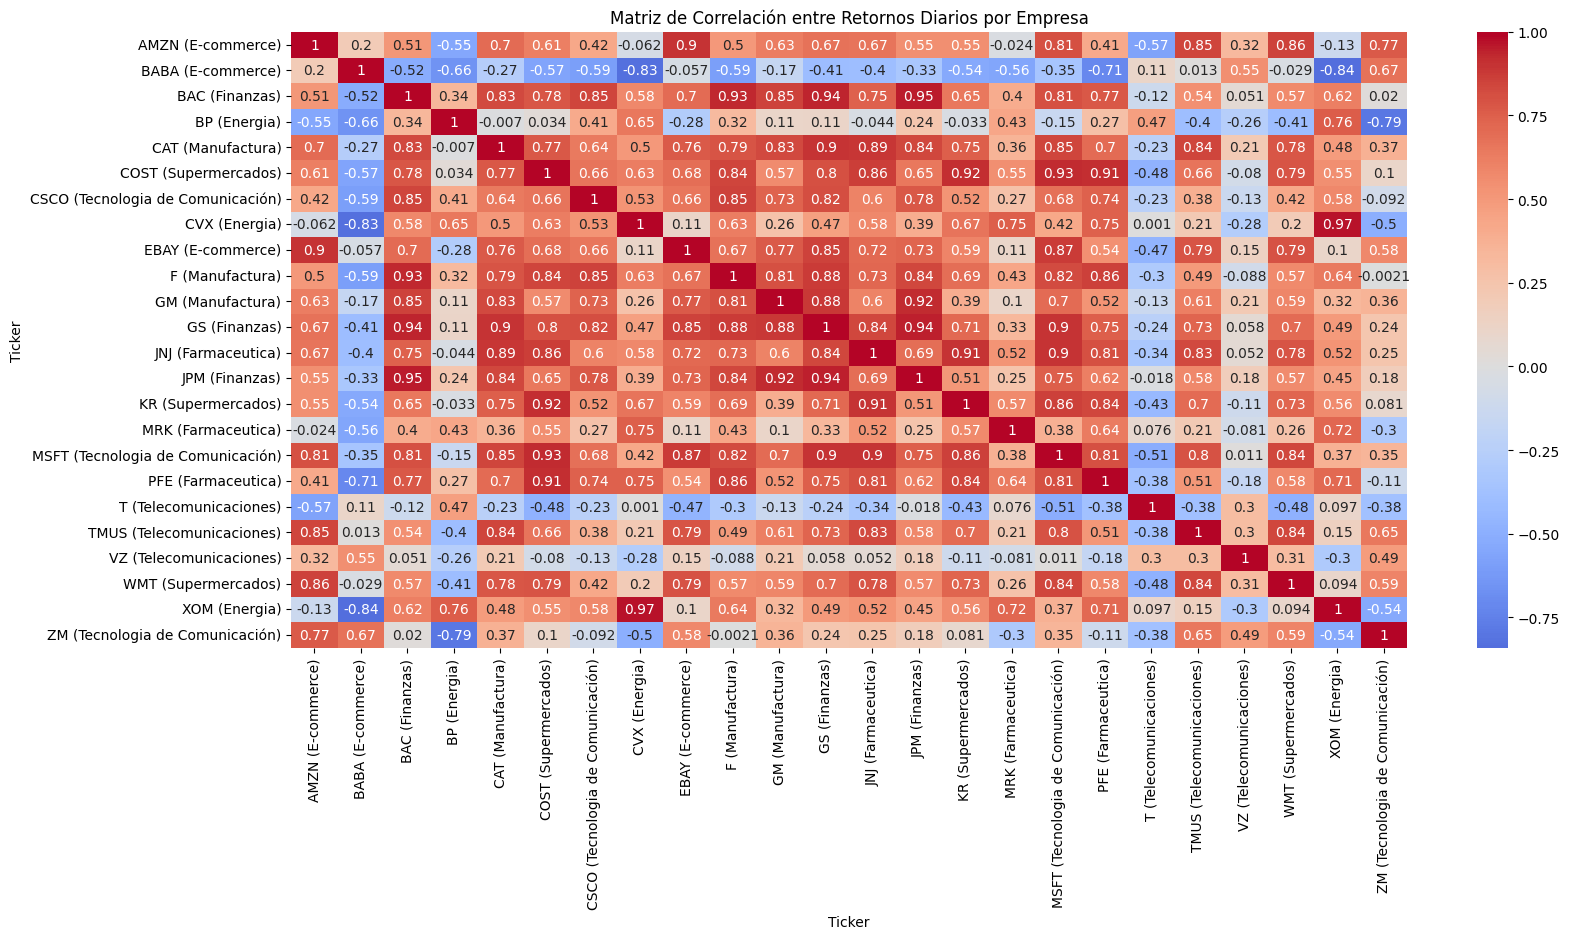

In [42]:
# Grafica de matrix de correlacion
plt.figure(figsize=(18,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            yticklabels=tickers_labels, xticklabels=tickers_labels)
plt.title('Matriz de Correlación entre Retornos Diarios por Empresa')
plt.show()


Correlación alta (positiva):

Empresas como CVX y XOM (sector energético) tienen una alta correlación (0.97). Esto es común en empresas del mismo sector, ya que están influenciadas por los mismos factores de mercado.
Las empresas financieras como JPM, GS y BAC también muestran una correlación positiva moderada (entre 0.5 y 0.8), lo que indica que sus retornos tienden a moverse en la misma dirección.
COST y WMT (sector supermercados) también muestran correlaciones moderadas (0.57), ya que ambas pertenecen al mismo sector.

Correlación baja o negativa:

Algunas empresas del sector tecnológico, como ZM (Zoom) y XOM (ExxonMobil), muestran correlaciones negativas (-0.79), lo que sugiere que sus retornos tienden a moverse en direcciones opuestas.
Las empresas del sector farmacéutico, como PFE y MRK, muestran una baja correlación (0.27), lo que indica que no siguen patrones de retorno similares.

Correlación entre sectores:

Generalmente, se observa que empresas del mismo sector tienden a mostrar correlaciones más altas (como energía, finanzas), mientras que aquellas en sectores muy diferentes tienden a mostrar correlaciones más bajas o incluso negativas.

## 4.7. Análisis de Tendencias y Estacionalidad

In [43]:
# Crar  df con ticker en columnas y valores de Adj close
seasonal_df = returns.pivot_table(values='Adj Close', index=returns.index, columns='Ticker')

In [47]:
resultados_descomposicion = {}

# Iterar sobre cada ticker (columna)
for ticker in seasonal_df.columns:
    data = seasonal_df[ticker].dropna()

    # Aplicar la descomposición solo si hay suficientes datos (suponiendo periodicidad anual de 365 días)
    if len(data) > 365:
        result = seasonal_decompose(data, model='additive', period=365)
        resultados_descomposicion[ticker] = result

In [48]:
# Diccionario de sectores
sectores = returns[['Sector','Ticker']].drop_duplicates().set_index('Ticker')['Sector'].to_dict()


def plot_descomposicion_ticker(ticker, resultados_descomposicion):
    result = resultados_descomposicion[ticker]
    sector = sectores[ticker]

    fig_seasonal = make_subplots(rows=2, cols=2, shared_xaxes=True,
                        vertical_spacing=0.1,
                        subplot_titles=('Observado', 'Tendencia', 'Estacionalidad', 'Residual'))

    # Observado
    fig_seasonal.add_trace(go.Scatter(x=result.observed.index, y=result.observed,
                             mode='lines', name='Observado'),
                  row=1, col=1)

    # Tendencia
    fig_seasonal.add_trace(go.Scatter(x=result.trend.index, y=result.trend,
                             mode='lines', name='Tendencia'),
                  row=1, col=2)

    # Estacionalidad
    fig_seasonal.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal,
                             mode='lines', name='Estacionalidad'),
                  row=2, col=1)

    # Residual
    fig_seasonal.add_trace(go.Scatter(x=result.resid.index, y=result.resid,
                             mode='lines', name='Residual'),
                  row=2, col=2)

    # Agregar líneas verticales para el inicio de la pandemia y el post-pandemia
    fig_seasonal.add_shape(type="line",
        x0="2020-03-01", y0=0, x1="2020-03-01", y1=1,
        yref="paper", xref="x",
        line=dict(color="red", width=2, dash="dash"))

    fig_seasonal.add_shape(type="line",
        x0="2021-06-01", y0=0, x1="2021-06-01", y1=1,
        yref="paper", xref="x",
        line=dict(color="green", width=2, dash="dash"))

    # Agregar anotaciones para las líneas
    fig_seasonal.add_annotation(
        x="2020-03-01", y=0.95,
        xref="x", yref="paper",
        text="Start pandemic",
        showarrow=True,
        arrowhead=2,
        ax=-40,
        ay=-10,
        font=dict(color="red"),
        bgcolor="white",
        bordercolor="red",
        borderwidth=1,
        borderpad=4,
    )

    fig_seasonal.add_annotation(
        x="2021-06-01", y=0.95,
        xref="x", yref="paper",
        text="Start post-pandemic",
        showarrow=True,
        arrowhead=2,
        ax=-40,
        ay=-10,
        font=dict(color="green"),
        bgcolor="white",
        bordercolor="green",
        borderwidth=1,
        borderpad=4,
    )

    fig_seasonal.update_layout(height=800, width=1600,
                                title_text=f"Descomposición de la serie temporal para {ticker} ({sector})",
                                showlegend=False)

    fig_seasonal.show()

# Bucle para visualizar todos los tickers
for ticker in resultados_descomposicion.keys():
    plot_descomposicion_ticker(ticker, resultados_descomposicion)

El análisis de descomposición de series de tiempo revela patrones significativos en el comportamiento de las empresas durante el periodo de la pandemia. En los primeros meses del brote, la mayoría de las empresas experimentaron una caída drástica en sus valores estacionales, alcanzando puntos mínimos en casi todas las observaciones. Sin embargo, algunas empresas demostraron una notable resiliencia frente a este impacto. Entre ellas, destacaron ExxonMobil (XOM) en el sector energético, Verizon (VZ) en telecomunicaciones, y las farmacéuticas Merck (MRK) y Johnson & Johnson (JNJ), así como el gigante del e-commerce Amazon (AMZN). Estas empresas lograron una corrección más rápida en sus métricas, evidenciando su capacidad para adaptarse a las condiciones adversas del mercado.

En el análisis del periodo post-pandemia, se observa una tendencia positiva sostenida en varias de estas empresas, lo que indica una sólida recuperación. En particular, ExxonMobil (XOM), Pfizer (PFE), Microsoft (MSFT), Merck (MRK), Kroger (KR), Johnson & Johnson (JNJ), Costco (COST), Caterpillar (CAT) y BP (BP) han mantenido un crecimiento robusto en sus series temporales. Esta tendencia no solo sugiere una recuperación efectiva, sino también una posible expansión en sus operaciones y mercados, reforzando su posición en un entorno post-pandemia.

In [ ]:
data = {
    'Ticker': [],
    'Fecha': [],
    'Observado': [],
    'Tendencia': [],
    'Estacionalidad': [],
    'Residual': []
}

for ticker, result in resultados_descomposicion.items():
    for date in result.observed.index:
        data['Ticker'].append(ticker)
        data['Fecha'].append(date)
        data['Observado'].append(result.observed[date])
        data['Tendencia'].append(result.trend[date])
        data['Estacionalidad'].append(result.seasonal[date])
        data['Residual'].append(result.resid[date])

df_resultados_descomposicion = pd.DataFrame(data)
df_resultados_descomposicion.to_csv('tendencia.csv')